In [4]:
from math import pi
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

In [5]:
def open_csv(name):
    file = pd.read_csv(name)
    file = file.drop(0)
    for col in file.columns:
        file[col] = [np.float64(i) for i in file[col]]
    return file

In [36]:
def spectrum_width(file):
    y = np.array(file[file.columns[1]])
    x = np.array(file[file.columns[0]])
    Amax_index = [i for i in range(len(y)) if y[i] == y.max()][0]
    Amin_index = 0
    Amax = y[Amax_index]
    for i in range(Amax_index, len(y)):
        current_max = y[i::].max()
        next_max = y[i + 2::].max()
        if (current_max == next_max):
            Amin = current_max
            Amin_index = [j for j in range(i, len(y)) if y[j] == current_max][0]
            break
            
    delta = 2 * abs(Amin_index - Amax_index)
    for i in range(Amax_index, len(y), 2*delta):
        current_max = y[i::].max()
        next_max = y[i + delta::].max()
        if (current_max == next_max):
            Amin = current_max
            Amin_index = [j for j in range(i, len(y)) if y[j] == current_max][0]
            break
    return abs(x[Amin_index] - x[0])
    

In [28]:
# Функция, которая будет давать A_min и A_max по графику
def find_delta(file):
    y = np.array(file[file.columns[1]])
    x = np.array(file[file.columns[0]])
    Amax_index = [i for i in range(len(y)) if y[i] == y.max()][0]
    Amin_index = 0
    Amax = y[Amax_index]
    for i in range(Amax_index, len(y)):
        current_max = y[i::].max()
        next_max = y[i + 2::].max()
        if (current_max == next_max):
            Amin = current_max
            Amin_index = [j for j in range(i, len(y)) if y[j] == current_max][0]
            break
    return abs(x[Amin_index] - x[Amax_index])

In [8]:
# Начальное состояние
begin_state = open_csv('BeginState.csv')
freqX2 = open_csv('FrequencyX2.csv')
timeX2 = open_csv('TimeX2.csv')

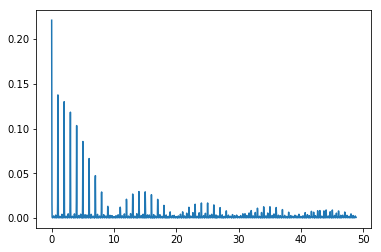

In [9]:
# Строим график
x = np.array(begin_state['Частота'])  
y = np.array(begin_state['Канал A'])
plt.plot(x,y)
plt.show()

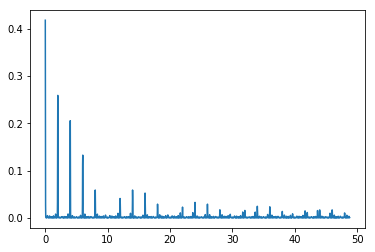

In [10]:
# Строим график
x = np.array(freqX2['Частота'])  
y = np.array(freqX2['Канал A'])
plt.plot(x,y)
plt.show()

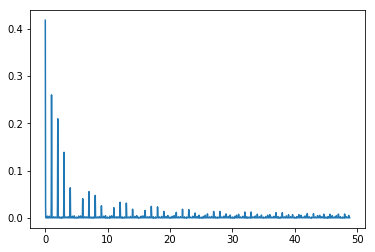

In [11]:
# Строим график
x = np.array(timeX2['Частота'])  
y = np.array(timeX2['Канал A'])
plt.plot(x, y)
plt.show()

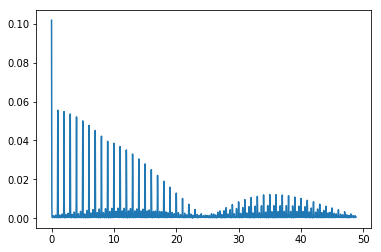

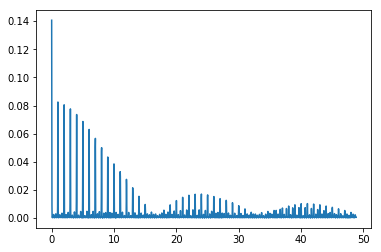

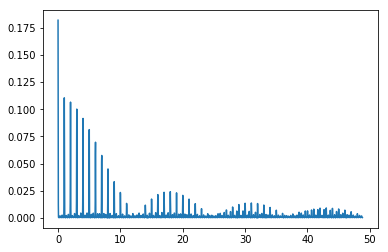

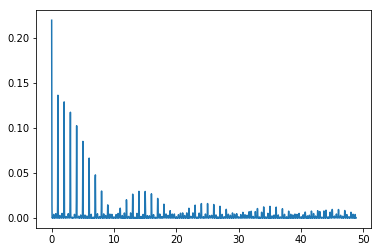

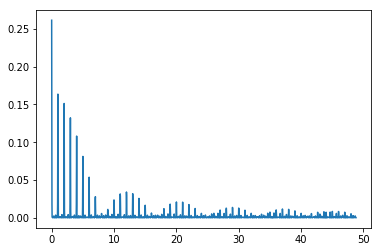

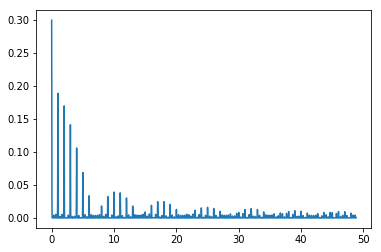

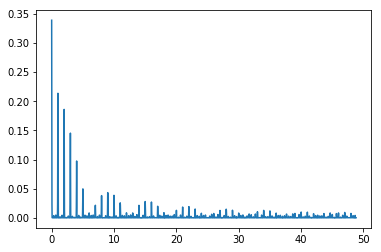

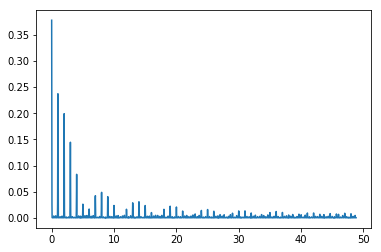

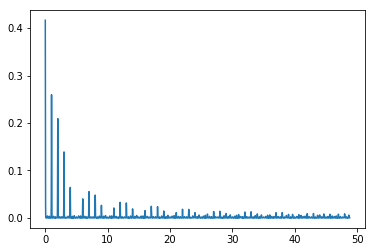

,"$\tau, \mu s$","$\Delta\nu$, kGz"
0,40,34.999847
1,60,24.008751
2,80,18.000603
3,100,25.010109
4,120,11.992455
5,140,18.000603
6,160,14.996529
7,180,19.001961
8,200,27.990341


In [37]:
#пункт 8
s = 40
frequency = list()
t = list()
while s <= 200:
    current = open_csv('point_8/{}us.csv'.format(s))
    x = np.array(current[current.columns[0]])
    y = np.array(current[current.columns[1]])
    plt.plot(x, y)
    plt.show()
    frequency.append(spectrum_width(current))
    t.append(s)
    s = s + 20
table = {r"$\tau, \mu s$": pd.Series(t), r"$\Delta\nu$, kGz": pd.Series(frequency)}
table = pd.DataFrame(table)
table

In [68]:
#пункт 9
us100 = open_csv('point_9/100us.csv')
us50 = open_csv('point_9/50us.csv')

x1 = np.array(us100[us100.columns[0]])
y1 = np.array(us100[us100.columns[1]])

ampl1 = [0.2205876, 0.02083885, 0.01628252, 0.01136647, 0.00849535]
f1 = []
for i in ampl1:
    a = [x for (x, y) in list(zip(x1, y1)) if y == i]
    f1.append(a[0])
table1 = pd.DataFrame({'Частота, кГц': pd.Series(f1), 'Амплитуда, В': pd.Series(ampl1)})
table1

,"Частота, кГц","Амплитуда, В"
0,0.000000,0.220588
1,15.020370,0.020839
2,25.010109,0.016283
3,36.001205,0.011366
4,45.013428,0.008495


In [67]:
us50 = open_csv('point_9/50us.csv')

x2 = np.array(us50[us50.columns[0]])
y2 = np.array(us50[us50.columns[1]])

ampl2 = [y2[0], 0.01445985, 0.00879789]
f2 = []
for i in ampl2:
    a = [x for (x, y) in list(zip(x2, y2)) if y == i]
    f2.append(a[0])
table2 = pd.DataFrame({'Частота, кГц': pd.Series(f2), 'Амплитуда, В': pd.Series(ampl2)})
table2

,"Частота, кГц","Амплитуда, В"
0,0.000000,0.121567
1,29.993057,0.014460
2,48.661232,0.008798


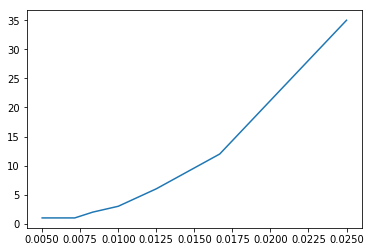

In [14]:
#пункт 10
x = np.array([np.float64(1/a) for a in t])
y = np.array(frequency)

plt.plot(x, y)
plt.show()

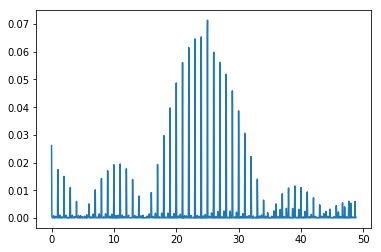

In [15]:
#пункт 16
us100 = open_csv('point_16/100us.csv')
us200 = open_csv('point_16/200us.csv')

x1 = np.array(us100[us100.columns[0]]) 
y1 = np.array(us100[us100.columns[1]]) 

x2 = np.array(us200[us200.columns[0]]) 
y2 = np.array(us200[us200.columns[1]]) 

plt.plot(x1, y1)
plt.show()

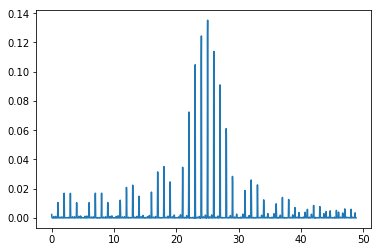

In [16]:
plt.plot(x2,y2)
plt.show()

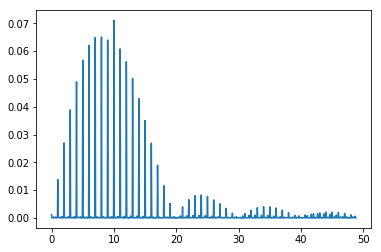

In [17]:
#пункт 17
kGz10 = open_csv('point_17/10kGz.csv')
kGz25 = open_csv('point_17/25kGz.csv')
kGz40 = open_csv('point_17/40kGz.csv')

x1 = np.array(kGz10[kGz10.columns[0]]) 
y1 = np.array(kGz10[kGz10.columns[1]]) 

x2 = np.array(kGz25[kGz25.columns[0]]) 
y2 = np.array(kGz25[kGz25.columns[1]]) 

x3 = np.array(kGz40[kGz40.columns[0]])
y3 = np.array(kGz40[kGz40.columns[1]])

plt.plot(x1, y1)
plt.show()

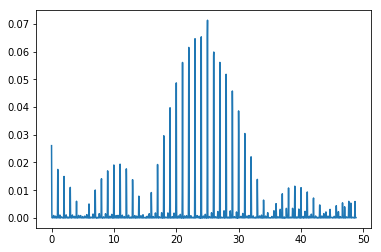

In [18]:
plt.plot(x2, y2)
plt.show()

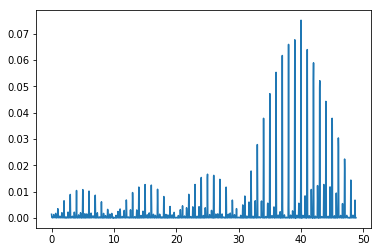

In [19]:
plt.plot(x3, y3)
plt.show()

In [34]:
#пункт 18
s = 1
frequency = list()
f = list()

current = open_csv('point_18/0,5kGz.csv')

frequency.append(find_delta(current))
f.append(0.5)

while s <= 5:
    current = open_csv('point_18/{}kGz.csv'.format(s))
    frequency.append(find_delta(current))
    f.append(s)
    if s == 2:
        s = s + 1
    s = s + 1
table = {r"$f, kGz$": pd.Series(f), r"$\delta\nu$, kGz": pd.Series(frequency)}
table = pd.DataFrame(table)
table

,"$f, kGz$","$\delta\nu$, kGz"
0,0.5,0.500679
1,1.0,1.001358
2,2.0,2.002716
3,4.0,4.005432
4,5.0,5.006790


In [ ]:
#пункт 19

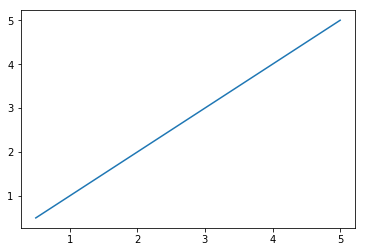

In [35]:
#пункт 20
x = np.array(table[table.columns[0]])
y = np.array(table[table.columns[0]])

plt.plot(x, y)
plt.show()